## Dead or Alive: Schelling's Model of Segregation in Macbeth

Agent-based model: Thomas Schelling's model of segregation: https://ccl.northwestern.edu/netlogo/models/Segregation

This Python implementation is based on: https://colab.research.google.com/github/QuantEcon/lecture-python.notebooks/blob/master/schelling.ipynb

In this rendition, the agents will be influential characters in the play "Macbeth" by William Shakespeare. Since the Schelling model pits two factions against one another, the application in our class' original text, "Romeo and Juliet," was obvious: Capulets and Montagues. However, no two factions exist as obviously in Macbeth. However, thanks to the number of deaths that Shakespeare wrote into his play (see "Overkill in Shakespeare," www.jstor.org/stable/2870902), another option was to split the character lists into "dead" and "alive." Using the Schelling model, we can see how the characters self-segregate into dead and alive categories. 

Not all characters are represented, as the character lists were adjusted to be equal in number to one another. The number of characters alive was greater than the number dead, meaning not all characters actually live at the end of the play were included in the "alive" category. 

Play text found at: https://www.gutenberg.org/ebooks/2264

Referenced in this project as: macbeth.txt.



In [2]:
# Import "random" and "sqrt" and "matplotlib.pyplot" for referencing random agents, measuring distance, and graphing. 
import random
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Creating the list of agents (dead and alive) and first declaring the dictionaries will help us parse the text into usable data.
#Characters that are dead at the end of the play "Macbeth" are added to the dictionary "dead_list". Characters alive at the end of the play are added to "alive_list". The dictionaries are not exhaustive.

dead_list = {
    'DUNCAN' : [], 
    'LADY MACDUFF' : [], 
    'LADY MACBETH' : [], 
    'MACBETH' : [],
    'BANQUO' : [], 
    'YOUNG SIWARD' : [], 
}

alive_list = {
    'MALCOLM' : [], 
    'MACDUFF' : [],
    'FLEANCE' : [], 
    'LENNOX' : [], 
    'ROSS' : [],
    'SIWARD' : [], 
}


In [4]:
# Open the text file 
play = open('macbeth.txt')

# Read the text from the file
play_text = play.read()

#print(play_text)

In [5]:
# Parse the text and add statements to character lists.
for character, statements in dead_list.items():
    start = 0
    while start != -1: 
        start = play_text.find(character + '.\n') 
        temp = play_text[start:]
        stop = temp.find('\n\n')
        statement = temp[:stop]
        dead_list[character].append(statement)
        play_text = play_text.replace(statement, '')
        
for character, statements in alive_list.items():
    start = 0
    while start != -1:
        start = play_text.find(character + '.\n')
        temp = play_text[start:]
        stop = temp.find('\n\n')
        statement = temp[:stop]
        alive_list[character].append(statement)
        play_text = play_text.replace(statement, '')



In [81]:
random.seed(10) 
class Agent:
    def __init__(self, agent_type, agent_name, agent_statement):
        self.type = agent_type
        self.name = agent_name
        self.statement = agent_statement.strip().replace('\n', '')
        self.draw_location()

    def draw_location(self):
        self.location = random.uniform(0, 1), random.uniform(0, 1)

    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        
        distances.sort()
        
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        self.neighbors = neighbors
        
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        while not self.happy(agents):
            self.draw_location()





In [10]:
num_of_type_0 = len(alive_list.items()) 
num_of_type_1 = len(dead_list.items()) 
num_neighbors = 4 
require_same_type = 3 

agents = []

for character_name, statement_list in alive_list.items():
    agent_name = character_name 
    agent_statement = random.choice(statement_list)
    agent = Agent(0, agent_name, agent_statement)
    agents.append(agent) 
    
for character_name, statement_list in dead_list.items():
    agent_name = character_name 
    agent_statement = random.choice(statement_list)
    
    agent = Agent(1, agent_name, agent_statement)

    agents.append(agent) 



count = 1
while True:
    print('Entering loop ', count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')


Entering loop  1
Entering loop  2
Converged, terminating.


In [72]:
for agent in agents:
    print(agent.name + " neighbors: ")
    for n in agent.neighbors: 
        print('\t' + n.name)

MALCOLM neighbors: 
	MACDUFF
	LENNOX
	FLEANCE
	YOUNG SIWARD
BANQUO neighbors: 
	LADY MACDUFF
	YOUNG SIWARD
	DUNCAN
	MACBETH
SIWARD neighbors: 
	MACDUFF
	ROSS
	FLEANCE
	LENNOX
MACBETH neighbors: 
	DUNCAN
	LADY MACDUFF
	YOUNG SIWARD
	BANQUO
DUNCAN neighbors: 
	MACBETH
	LADY MACDUFF
	YOUNG SIWARD
	BANQUO
ROSS neighbors: 
	MACDUFF
	SIWARD
	FLEANCE
	LENNOX
FLEANCE neighbors: 
	MACDUFF
	SIWARD
	LENNOX
	ROSS
YOUNG SIWARD neighbors: 
	LENNOX
	LADY MACDUFF
	DUNCAN
	BANQUO
MACDUFF neighbors: 
	SIWARD
	ROSS
	FLEANCE
	LENNOX
LADY MACBETH neighbors: 
	BANQUO
	LADY MACDUFF
	YOUNG SIWARD
	DUNCAN
LADY MACDUFF neighbors: 
	BANQUO
	DUNCAN
	YOUNG SIWARD
	MACBETH
LENNOX neighbors: 
	FLEANCE
	MALCOLM
	YOUNG SIWARD
	MACDUFF


In [74]:
import networkx as nx

In [75]:
G = nx.Graph()
G


In [76]:
for agent in agents:
    G.add_node(agent.name) 
    
G.nodes()

NodeView(('MALCOLM', 'BANQUO', 'SIWARD', 'MACBETH', 'DUNCAN', 'ROSS', 'FLEANCE', 'YOUNG SIWARD', 'MACDUFF', 'LADY MACBETH', 'LADY MACDUFF', 'LENNOX'))

In [77]:

for agent in agents: 
    for n in agent.neighbors: 
        G.add_edge(agent.name, n.name) 
        

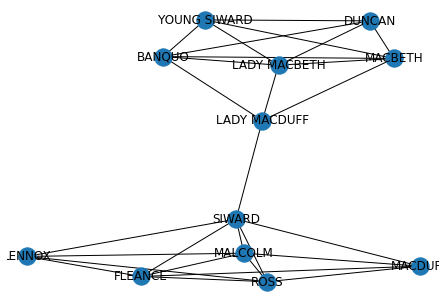

In [16]:
# Visualize the network
nx.draw(G, with_labels=True)

In [82]:
dialogue_list = []

for agent in agents:
    n = random.choice(agent.neighbors)
    if n.statement not in dialogue_list:
        dialogue_list.append(n.statement)

print(*dialogue_list, sep = "\n") 


MACDUFF.I am not treacherous.
MACBETH.Then live, Macduff: what need I fear of thee?But yet I’ll make assurance double sure,And take a bond of fate. Thou shalt not live;That I may tell pale-hearted fear it lies,And sleep in spite of thunder.
LENNOX.For certain, sir, he is not. I have a fileOf all the gentry: there is Siward’s sonAnd many unrough youths, that even nowProtest their first of manhood.
DUNCAN.What he hath lost, noble Macbeth hath won.

ROSS.Sir, amen.
BANQUO.It will be rain tonight.
YOUNG SIWARD.Thou liest, abhorred tyrant. With my swordI’ll prove the lie thou speak’st.
